In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_excel("PROG.xlsx")
df2 = pd.read_excel("IDE_DATA.xlsx")
df1, df2

(   Programmers Using IDE-A Using IDE-B
 0            1      Prog-1      Prog-2
 1            2      Prog-2      Prog-1
 2            3      Prog-1      Prog-2
 3            4      Prog-1      Prog-2
 4            5      Prog-2      Prog-1
 5            6      Prog-2      Prog-1
 6            7      Prog-1      Prog-2
 7            8      Prog-2      Prog-1
 8            9      Prog-1      Prog-2
 9           10      Prog-2      Prog-1,
    Programmer  Time_Prog1  Time_Prog2
 0           1         104        71.3
 1           2         102       110.0
 2           3         159       178.0
 3           4         168       153.0
 4           5         150       120.0
 5           6         151       174.0
 6           7         111        94.9
 7           8         105        86.1
 8           9         137       115.0
 9          10         124       175.0)

In [4]:
# Mapping from design table program names to data table columns
prog_map = {
    'Prog-1': 'Time_Prog1',
    'Prog-2': 'Time_Prog2'
}


In [ ]:
# Initialize IDE columns
df2['IDE_A'] = 0.0
df2['IDE_B'] = 0.0

# Map times according to design
for i, row in df1.iterrows():
    prog_a = prog_map[row['Using IDE-A'].strip()]  
    prog_b = prog_map[row['Using IDE-B'].strip()]
    
    df2.at[i, 'IDE_A'] = df2.at[i, prog_a]
    df2.at[i, 'IDE_B'] = df2.at[i, prog_b]

print(df2[['Programmer', 'IDE_A', 'IDE_B']])


   Programmer  IDE_A  IDE_B
0           1  104.0   71.3
1           2  110.0  102.0
2           3  159.0  178.0
3           4  168.0  153.0
4           5  120.0  150.0
5           6  174.0  151.0
6           7  111.0   94.9
7           8   86.1  105.0
8           9  137.0  115.0
9          10  175.0  124.0


In [28]:
df_melted = df2.melt(id_vars='Programmer', value_vars=['IDE_A', 'IDE_B'],
                         var_name='IDE', value_name='Time')


In [6]:
print("IDE-A stats:")
print(df2['IDE_A'].describe())

print("\nIDE-B stats:")
print(df2['IDE_B'].describe())


IDE-A stats:
count     10.000000
mean     134.410000
std       32.599811
min       86.100000
25%      110.250000
50%      128.500000
75%      165.750000
max      175.000000
Name: IDE_A, dtype: float64

IDE-B stats:
count     10.000000
mean     124.420000
std       32.847012
min       71.300000
25%      102.750000
50%      119.500000
75%      150.750000
max      178.000000
Name: IDE_B, dtype: float64


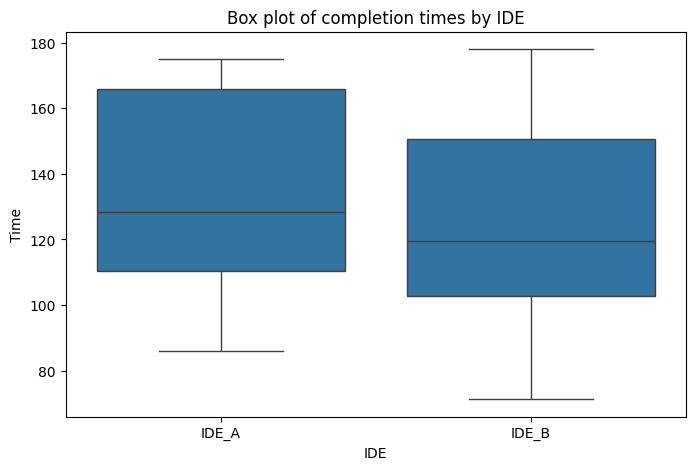

In [16]:
# Reshape data into long format
df_melted = df2.melt(id_vars=['Programmer'], 
                     value_vars=['IDE_A', 'IDE_B'],
                     var_name='IDE', 
                     value_name='Time')

# Box plot
plt.figure(figsize=(8,5))
sns.boxplot(x='IDE', y='Time', data=df_melted)
plt.title('Box plot of completion times by IDE')
plt.show()


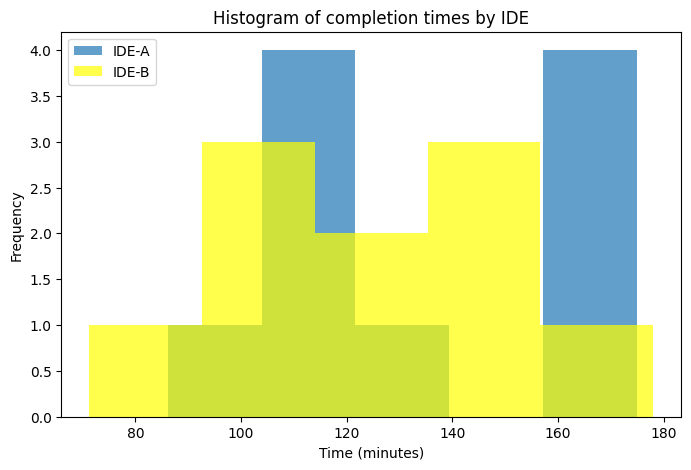

In [ ]:
#Histogram
plt.figure(figsize=(8,5))
plt.hist(df2['IDE_A'], alpha=0.7, label='IDE-A', bins=5)
plt.hist(df2['IDE_B'], alpha=0.7, label='IDE-B', bins=5, color="yellow")
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of completion times by IDE')
plt.legend()
plt.show()


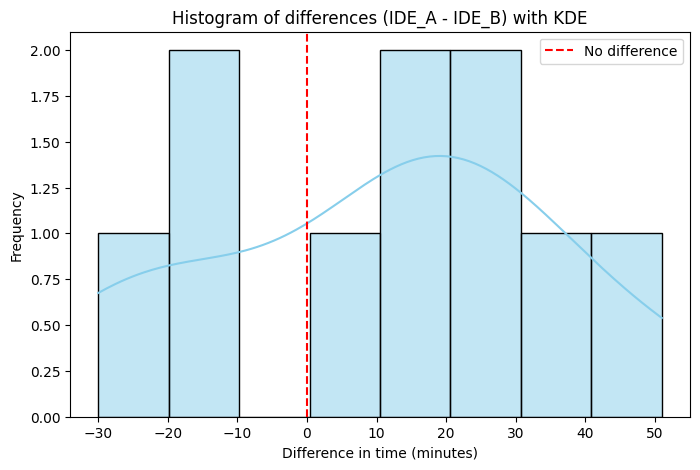

In [ ]:
# Calculates differences between IDE_A and IDE_B
df2['Diff'] = df2['IDE_A'] - df2['IDE_B']

#Histogram with a KDE (bell-like curve)
plt.figure(figsize=(8,5))
sns.histplot(df2['Diff'], kde=True, bins=8, color='skyblue', edgecolor='black')

plt.title("Histogram of differences (IDE_A - IDE_B) with KDE")
plt.xlabel("Difference in time (minutes)")
plt.ylabel("Frequency")

#Adds vertical line at 0 to see which IDE is faster overall
plt.axvline(0, color='red', linestyle='--', label='No difference')
plt.legend()

plt.show()



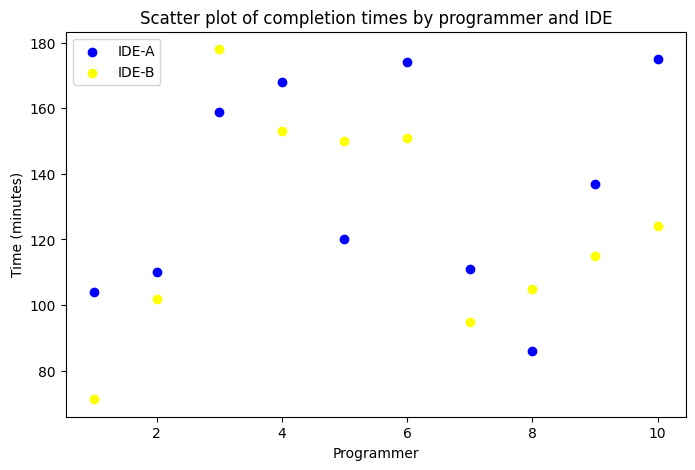

In [ ]:
#Scatter plot
plt.figure(figsize=(8,5))
plt.scatter(df2['Programmer'], df2['IDE_A'], color='blue', label='IDE-A')
plt.scatter(df2['Programmer'], df2['IDE_B'], color='yellow', label='IDE-B')
plt.xlabel('Programmer')
plt.ylabel('Time (minutes)')
plt.title('Scatter plot of completion times by programmer and IDE')
plt.legend()
plt.show()


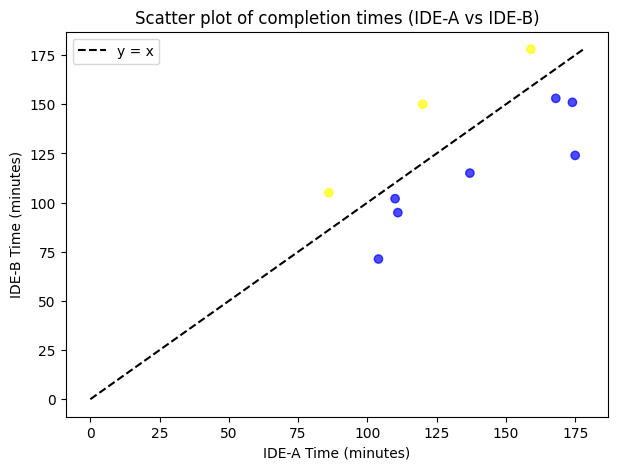

In [ ]:
colors = ['blue' if b < a else 'yellow' for a, b in zip(df2['IDE_A'], df2['IDE_B'])]

plt.figure(figsize=(7,5))
plt.scatter(df2['IDE_A'], df2['IDE_B'], c=colors, alpha=0.7)

# References line y = x
max_time = max(df2['IDE_A'].max(), df2['IDE_B'].max())
plt.plot([0, max_time], [0, max_time], 'k--', label='y = x')

plt.xlabel("IDE-A Time (minutes)")
plt.ylabel("IDE-B Time (minutes)")
plt.title("Scatter plot of completion times (IDE-A vs IDE-B)")
plt.legend()

plt.show()


In [ ]:
from scipy.stats import shapiro

df2['Diff'] = df2['IDE_A'] - df2['IDE_B']

# Runs Shapiro-Wilk test
stat, p = shapiro(df2['Diff'])
print(f"Shapiro-Wilk test statistic = {stat:.3f}, p-value = {p:.3f}")

if p > 0.05:
    print("Differences are approximately normally distributed → parametric test is appropriate.")
else:
    print("Differences are not normal → consider a non-parametric test (Wilcoxon).")


Shapiro-Wilk test statistic = 0.941, p-value = 0.569
Differences are approximately normally distributed → parametric test is appropriate.


In [ ]:
from scipy.stats import ttest_rel

print("Columns in df2:", df2.columns)
print("\nFirst 5 rows of df2:\n", df2.head())
print("\nData types:\n", df2.dtypes)

#Runs paired t-test
t_stat, p_value = ttest_rel(df2['IDE_A'], df2['IDE_B'])

print("\nPaired t-test results:")
print("t-statistic =", t_stat)
print("Two-sided p-value =", p_value)

alpha = 0.05
if p_value < alpha:
    print("Result: Reject the null hypothesis → there is a significant difference between IDE-A and IDE-B.")
else:
    print("Result: Fail to reject the null hypothesis → no significant difference between IDE-A and IDE-B.")


Columns in df2: Index(['Programmer', 'Time_Prog1', 'Time_Prog2', 'IDE_A', 'IDE_B', 'Diff'], dtype='object')

First 5 rows of df2:
    Programmer  Time_Prog1  Time_Prog2  IDE_A  IDE_B  Diff
0           1         104        71.3  104.0   71.3  32.7
1           2         102       110.0  110.0  102.0   8.0
2           3         159       178.0  159.0  178.0 -19.0
3           4         168       153.0  168.0  153.0  15.0
4           5         150       120.0  120.0  150.0 -30.0

Data types:
 Programmer      int64
Time_Prog1      int64
Time_Prog2    float64
IDE_A         float64
IDE_B         float64
Diff          float64
dtype: object

Paired t-test results:
t-statistic = 1.2389260438458134
Two-sided p-value = 0.2467095826343621
Result: Fail to reject the null hypothesis → no significant difference between IDE-A and IDE-B.


C:\Users\User\AppData\Local\Temp\ipykernel_22612\999221410.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', num_programmers)  # 'tab10' has 10 distinct colors


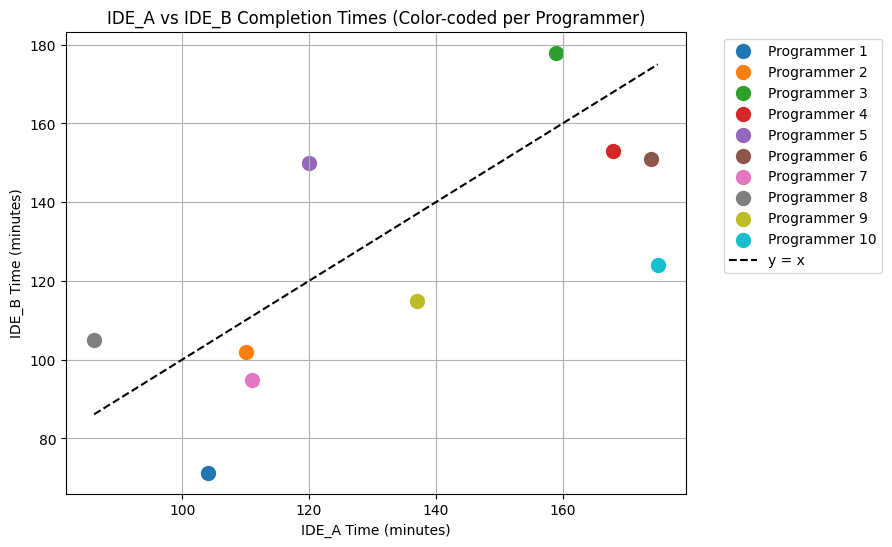

In [ ]:
# Generates a color map with as many colors as programmers
num_programmers = df2.shape[0]
colors = cm.get_cmap('tab10', num_programmers)  # 'tab10' has 10 distinct colors

plt.figure(figsize=(8,6))

# Scatter plot with color per programmer
for i in range(num_programmers):
    plt.scatter(df2['IDE_A'][i], df2['IDE_B'][i],
                color=colors(i), s=100, label=f"Programmer {df2['Programmer'][i]}")

# Adds y = x line
plt.plot([df2['IDE_A'].min(), df2['IDE_A'].max()],
         [df2['IDE_A'].min(), df2['IDE_A'].max()],
         color='black', linestyle='--', label='y = x')

plt.title('IDE_A vs IDE_B Completion Times (Color-coded per Programmer)')
plt.xlabel('IDE_A Time (minutes)')
plt.ylabel('IDE_B Time (minutes)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # place legend outside
plt.grid(True)
plt.show()

